In [1]:
import pandas as pd
df=pd.read_csv('d:/data/wine/winequality-red2.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [2]:
df['class'].value_counts()

1    855
0    744
Name: class, dtype: int64

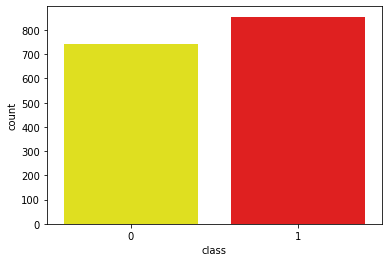

In [3]:
%matplotlib inline
import seaborn as sns
colors=['yellow','red']
sns.countplot('class',data=df,palette=colors) #카운트 플롯

In [4]:
train_cols=df.columns[0:11]
X=df[train_cols] #독립변수
y=df['class'] #종속변수

Using TensorFlow backend.


1    744
0    744
Name: class, dtype: int64


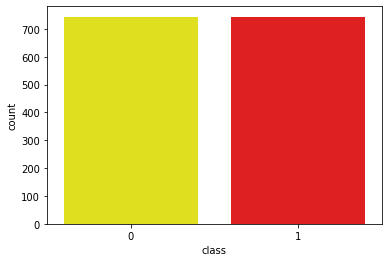

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)
colors=['yellow','red']
sns.countplot('class',data=df2,palette=colors)
print(df2['class'].value_counts())

In [6]:
X=X_samp[train_cols] #독립변수
y=y_samp['class']

In [8]:
import statsmodels.api as sm
model=sm.Logit(y,X) #로지스틱 회귀분석 모형
result=model.fit() #기계학습
# print('회귀계수\n',result.params)
# print('r-value:\n{:4.2f}%'.format(result.rsquared))
# print('p-value:\n{:4.2f}%'.format(result.pvalues))
# print('모형요약\n',result.summary())
result.summary2() #모형 요약
#Pseudo R-squared: 0.250 모형 설명력 25%
#유의하지 않은 변수 : residual sugar > pH> fixed acidity

Optimization terminated successfully.
         Current function value: 0.519201
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.251      
Dependent Variable:  class             AIC:               1567.1410  
Date:                2020-03-26 15:55  BIC:               1625.4980  
No. Observations:    1488              Log-Likelihood:    -772.57    
Df Model:            10                LL-Null:           -1031.4    
Df Residuals:        1477              LLR p-value:       7.3971e-105
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.0667   0.0654  1.0192 0.3081  -0.0616  0.1950
volatile acidity     -3.1223   0.5007 -6.2355 0.0000  -4.1036 -2.1409
citric acid          -1.0057   0.5823 -1.7272 0.0841  -2.1470  0.1356
residual sugar        0.0202   0.0471  0.4297 0.6674  -0.0720  0.1124
chlorides            -3.8639   1.5852 -2.4375 0.0148  -6.9708 -0.7570
free sulfur dioxide   0.0238   0.0086  2.7595 0.0058   0.0069  0.0406
total sulfur dioxide -0.0174   0.0030 -5.7611 0.0000  -0.0234 -0.0115
density              -6.7033   2.4215 -2.7683 0.0056 -11.4494 -1.9573
pH                   -0.7199   0.6189 -1.1632 0.2447  -1.9329  0.4931
sulphates             2.7734   0.4470  6.2046 0.0000   1.8973  3.6495
alcohol               0.9043   0.0761 11.8899 0.0000   0.7553  1.0534
=====================================================================

"""

In [ ]:
X.columns

In [ ]:
#residual sugar를 제외한 모형
X=X_samp[['fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
model=sm.Logit(y,X) #로지스틱 회귀분석 모형
result=model.fit() #기계학습
result.summary2()

In [ ]:
#residual sugar,fixed acidity 를 제외한 모형
X=X_samp[['volatile acidity', 'citric acid','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
model=sm.Logit(y,X) #로지스틱 회귀분석 모형
result=model.fit() #기계학습
result.summary2()

In [ ]:
#residual sugar,fixed acidity,citric acid 를 제외한 모형
X=X_samp[['volatile acidity',
          'chlorides', 'free sulfur dioxide', 
          'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
model=sm.Logit(y,X) #로지스틱 회귀분석 모형
result=model.fit() #기계학습
result.summary2()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#학습용,검증용 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
model=LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
print(model.score(X_train,y_train)) #학습용 예측 정확도
print(model.score(X_test,y_test)) #검증용 예측 정확도